In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
learning_progress = pd.DataFrame()

# Add a range of 100 dates starting Jan 1, 2017.
learning_progress['date'] = pd.date_range(start='2017-01-01', periods=100)

# Add linearly increasing knowledge and oscillating confidence.
learning_progress['knowledge'] = np.arange(0, 100)
learning_progress['confidence'] = 10 * np.cos(np.arange(0, 100) * np.pi / 7) + np.arange(0, 100)

Text(0.5, 1.0, 'Scatter Plot')

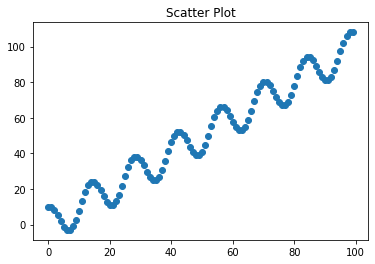

In [3]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.title('Scatter Plot')

Text(0.5, 1.0, 'Linked Scatter Plot')

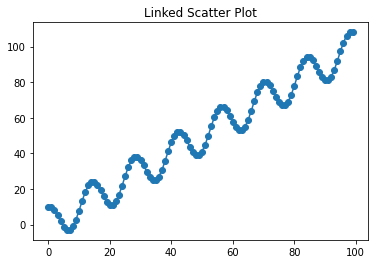

In [4]:
plt.scatter(learning_progress.knowledge, learning_progress.confidence)
plt.plot(learning_progress.knowledge, learning_progress.confidence)
plt.title('Linked Scatter Plot')

No handles with labels found to put in legend.


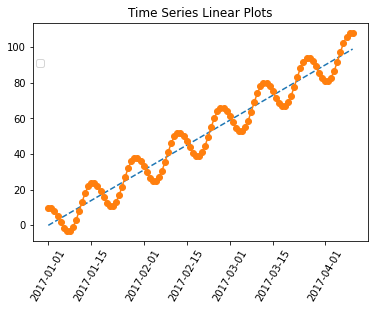

In [5]:
plt.plot(learning_progress.date, learning_progress.knowledge, '--')
plt.plot(learning_progress.date, learning_progress.confidence, 'o-')
plt.xticks(rotation=60)
plt.legend(loc = (.01,.8))
plt.title('Time Series Linear Plots')
plt.show()

In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Note that for sklearn we must convert our data to numeric.
X = pd.DataFrame(pd.to_numeric(learning_progress['date']))
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9431566970528262

In [8]:
learning_progress['day_of_week'] = learning_progress.date.apply(
    lambda x: str(dt.datetime.weekday(x)))

X = pd.get_dummies(learning_progress.day_of_week)
X['date'] = pd.to_numeric(learning_progress.date) / (1000000000 * 24 * 60 * 60)
Y = learning_progress['confidence']
lm.fit(X, Y)
lm.score(X, Y)

0.9432516072175564